In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [181]:
df = pd.read_csv("wind_dataset.csv", index_col="DATE", parse_dates=True)
df.tail()


,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
DATE,,,,,,,,
1978-12-27,14.46,0,16.8,0.0,9.8,0.0,4.0,0.0
1978-12-28,14.33,0,16.0,0.0,9.1,0.0,8.5,8.0
1978-12-29,19.17,0,14.7,0.0,5.0,0.0,3.5,3.2
1978-12-30,18.08,0,4.9,0.0,2.9,0.0,0.3,-0.5
1978-12-31,19.25,0,0.5,0.0,1.2,1.0,-1.5,-3.0


In [182]:
df.shape

(6574, 8)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6574 entries, 1961-01-01 to 1978-12-31
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WIND     6574 non-null   float64
 1   IND      6574 non-null   int64  
 2   RAIN     6574 non-null   float64
 3   IND.1    6513 non-null   float64
 4   T.MAX    5953 non-null   float64
 5   IND.2    6513 non-null   float64
 6   T.MIN    5900 non-null   float64
 7   T.MIN.G  6214 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 462.2 KB


In [184]:
df.isnull().sum()

WIND         0
IND          0
RAIN         0
IND.1       61
T.MAX      621
IND.2       61
T.MIN      674
T.MIN.G    360
dtype: int64

In [185]:
colu = ["IND.1","T.MAX" ,"IND.2" ,"T.MIN" ,"T.MIN.G" ]
for i in colu:
    print(i)
    print(df[i].mode())

IND.1
0    0.0
Name: IND.1, dtype: float64
T.MAX
0    10.0
Name: T.MAX, dtype: float64
IND.2
0    0.0
Name: IND.2, dtype: float64
T.MIN
0    9.0
Name: T.MIN, dtype: float64
T.MIN.G
0    5.0
Name: T.MIN.G, dtype: float64


In [186]:
FilterInd1 = 0.0
FilterTmax = 10.0
FilterInd =0.0
FilterTMIN = 9.0
FilterTMIN_g = 5.0
df["IND.1"].fillna(FilterInd1 , inplace = True)
df["T.MAX"].fillna(FilterTmax , inplace = True)
df["IND.2"].fillna(FilterInd , inplace = True)
df["T.MIN"].fillna(FilterTMIN , inplace = True)
df["T.MIN.G"].fillna(FilterTMIN_g , inplace = True)

In [187]:
df.isnull().sum()

WIND       0
IND        0
RAIN       0
IND.1      0
T.MAX      0
IND.2      0
T.MIN      0
T.MIN.G    0
dtype: int64

<AxesSubplot:xlabel='WIND'>

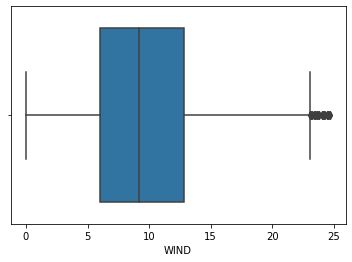

In [190]:
sns.boxplot(x=df['WIND'])


In [189]:
z_scores = (df['WIND'] - df['WIND'].mean()) / df['WIND'].std()
outliers = np.abs(z_scores) > 3
median = df['WIND'].median()
df.loc[outliers, 'WIND'] = median

z_scores = (df['IND'] - df['IND'].mean()) / df['IND'].std()
outliers = np.abs(z_scores) > 3
median = df['IND'].median()
df.loc[outliers, 'IND'] = median

z_scores = (df['RAIN'] - df['RAIN'].mean()) / df['RAIN'].std()
outliers = np.abs(z_scores) > 3
median = df['RAIN'].median()
df.loc[outliers, 'RAIN'] = median

z_scores = (df['IND.1'] - df['IND.1'].mean()) / df['IND.1'].std()
outliers = np.abs(z_scores) > 3
median = df['IND.1'].median()
df.loc[outliers, 'IND.1'] = median

z_scores = (df['T.MAX'] - df['T.MAX'].mean()) / df['T.MAX'].std()
outliers = np.abs(z_scores) > 3
median = df['T.MAX'].median()
df.loc[outliers, 'T.MAX'] = median

z_scores = (df['IND.2'] - df['IND.2'].mean()) / df['IND.2'].std()
outliers = np.abs(z_scores) > 3
median = df['IND.2'].median()
df.loc[outliers, 'IND.2'] = median

z_scores = (df['T.MIN'] - df['T.MIN'].mean()) / df['T.MIN'].std()
outliers = np.abs(z_scores) > 3
median = df['T.MIN'].median()
df.loc[outliers, 'T.MIN'] = median

z_scores = (df['T.MIN.G'] - df['T.MIN.G'].mean()) / df['T.MIN.G'].std()
outliers = np.abs(z_scores) > 3
median = df['T.MIN.G'].median()
df.loc[outliers, 'T.MIN.G'] = median




In [192]:
df.head()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
DATE,,,,,,,,
1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [193]:
x1,x2,x3,x4,x5,x6,x7 = df['IND'], df['RAIN'],df['IND.1'],df['T.MAX'],df['IND.2'],df['T.MIN'],df['T.MIN.G']
y = df['WIND']
x1,x2,x3,x4,x5,x6,x7,y = np.array(x1),np.array(x2),np.array(x3),np.array(x4),np.array(x5),np.array(x6),np.array(x7),np.array(y)
x1,x2,x3,x4,x5,x6,x7,y = x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),x4.reshape(-1,1),x5.reshape(-1,1),x6.reshape(-1,1),x7.reshape(-1,1),y.reshape(-1,1)
final_x = np.concatenate((x1,x2,x3,x4,x5,x6,x7), axis = 1)
print(final_x)

[[ 0.   0.2  0.  ...  0.   3.7 -1. ]
 [ 0.   5.1  0.  ...  0.   4.2  1.1]
 [ 0.   0.4  0.  ...  0.   0.5 -0.5]
 ...
 [ 0.   0.2  0.  ...  0.   3.5  3.2]
 [ 0.   4.9  0.  ...  0.   0.3 -0.5]
 [ 0.   0.5  0.  ...  1.  -1.5 -3. ]]


In [194]:
len(final_x)

6574

In [195]:
len(y)

6574

In [196]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_x, y, test_size=0.2,random_state=23 ,shuffle=False)

In [197]:
print(x_train)

[[ 0.   0.2  0.  ...  0.   3.7 -1. ]
 [ 0.   5.1  0.  ...  0.   4.2  1.1]
 [ 0.   0.4  0.  ...  0.   0.5 -0.5]
 ...
 [ 0.   0.   0.  ...  0.   3.5 -3.8]
 [ 0.   0.   0.  ...  0.   2.6  0.5]
 [ 0.   0.   0.  ...  0.   9.2  3.2]]


In [198]:
print(x_test)

[[ 0.   0.   0.  ...  0.   7.2 -1. ]
 [ 0.   0.   0.  ...  0.   7.9 -0.6]
 [ 0.   0.   0.  ...  0.   3.6 -0.5]
 ...
 [ 0.   0.2  0.  ...  0.   3.5  3.2]
 [ 0.   4.9  0.  ...  0.   0.3 -0.5]
 [ 0.   0.5  0.  ...  1.  -1.5 -3. ]]


In [199]:
print(y_train)

[[13.67]
 [11.5 ]
 [11.25]
 ...
 [ 5.71]
 [ 7.96]
 [ 9.62]]


In [200]:
print(y_test)

[[ 9.92]
 [ 6.87]
 [ 3.92]
 ...
 [19.17]
 [18.08]
 [19.25]]


In [201]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, random_state=20,bootstrap= True, max_features=7)

In [202]:
rfr.fit(x_train, y_train)

<ipython-input-202-da087e9fd0ca>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_train, y_train)


RandomForestRegressor(max_features=7, random_state=20)

In [203]:
y_pred = rfr.predict(x_test)
print(y_pred)

[ 6.9805  6.858   4.3006 ... 18.249  17.7637 10.6696]


In [204]:
y_pred_ver = y_pred.reshape(len(y_pred), 1)
y_pred_ver = np.round(y_pred_ver)
print(y_pred_ver)

[[ 7.]
 [ 7.]
 [ 4.]
 ...
 [18.]
 [18.]
 [11.]]


In [205]:
y_true_ver = y_test.reshape(len(y_test), 1)
y_true_ver = np.round(y_true_ver)
print(y_true_ver)

[[10.]
 [ 7.]
 [ 4.]
 ...
 [19.]
 [18.]
 [19.]]


In [206]:
pred_comp = np.concatenate((y_true_ver, y_pred_ver), axis = 1)
print(pred_comp)

[[10.  7.]
 [ 7.  7.]
 [ 4.  4.]
 ...
 [19. 18.]
 [18. 18.]
 [19. 11.]]


In [207]:
df = pd.DataFrame(pred_comp)
df.head(5)

,0,1
0,10.0,7.0
1,7.0,7.0
2,4.0,4.0
3,5.0,11.0
4,3.0,3.0


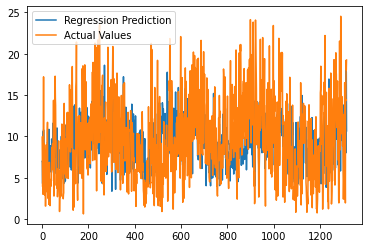

In [208]:
pred = rfr.predict(x_test)
import matplotlib.pyplot as plt
plt.plot(y_pred, label = "Regression Prediction")
plt.plot(y_test, label = "Actual Values")
plt.legend(loc="upper left")
plt.show()

In [209]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(y_test, y_pred)
error

3.5922119923668574